Loading required libraries

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
%matplotlib inline
plt.style.use('bmh')
warnings.filterwarnings('ignore')
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000

In [2]:
#Importing the Data

telecom=pd.read_csv('Telecom_customer_churn.csv')

In [3]:
telecom.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


Target column churn distribution

0    50438
1    49562
Name: churn, dtype: int64

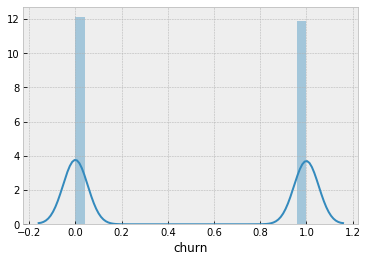

In [28]:
sns.distplot(telecom['churn'])
telecom['churn'].value_counts()

In [5]:
# Number of each type of column
telecom.dtypes.value_counts()

float64    69
object     21
int64      10
dtype: int64

In [33]:
#Move Specified column to last
def move_to_last(df,column):
    churn=df[column]
    df_lst=df.drop([column],axis=1)
    df_lst=pd.concat([df_lst,churn],axis=1)
    return df_lst 

telecom=move_to_last(telecom,'churn')

In [6]:
#Define missing values.
def missing_values(df):
    #Total missing values
    mis_val=df.isnull().sum()
    mis_val=pd.DataFrame({'Column_Name':mis_val.index,'Missing_value':mis_val.values})
    #Percentage missing value
    mis_val_percent=100*df.isnull().sum()/len(df)
    mis_val_percent=pd.DataFrame({'Column_Name':mis_val_percent.index,'Perc_of_Total_values':mis_val_percent.values})
    #table with results
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1,ignore_index=True)
    #rename and select required columns
    mis_val_table_with_column=mis_val_table.rename(columns=
                                                  {0:'Column_Name',1:'Missing_value',3:'Perc_of_Total_values'})
    mis_val_table_with_column=mis_val_table_with_column[['Column_Name','Missing_value','Perc_of_Total_values']]
    
    #Sort tabels by %of columns.
    mis_val_table_with_column=mis_val_table_with_column[mis_val_table_with_column.iloc[:,1]!=0].sort_values(
        'Perc_of_Total_values',ascending=False).round(1)
    
    #print summary infromation
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_with_column.shape[0]) +
              " columns that have missing values.")
    return mis_val_table_with_column

Missing column distribution

In [7]:
missing_values(telecom)

Your selected dataframe has 100 columns.
There are 43 columns that have missing values.


,Column_Name,Missing_value,Perc_of_Total_values
87,numbcars,49366,49.4
89,dwllsize,38308,38.3
88,HHstatin,37923,37.9
80,ownrent,33706,33.7
82,dwlltype,31909,31.9
81,lor,30190,30.2
86,income,25436,25.4
84,adults,23019,23.0
85,infobase,22079,22.1
77,hnd_webcap,10189,10.2


In [10]:
telecom_num = telecom.select_dtypes(include = ['float64', 'int64'])
telecom_num=telecom_num.drop(['Customer_ID'],axis=1)
telecom_num.head()


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.98999,2.0,2.0,0.0,0.0,15.0,1.0,4.0,3.0,0.0,361.0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,NaN,7.0,6.0,1.0,1.0,1.0,1.0,5.0,1.0,0.0,240.0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,29.98999,2.0,1.0,0.0,0.0,7.0,2.0,5.0,2.0,0.0,1504.0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,29.98999,1.0,1.0,0.0,0.0,6.0,4.0,6.0,1.0,0.0,1812.0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,149.98999,6.0,4.0,0.0,0.0,5.0,1.0,6.0,1.0,0.0,434.0


Distribution of Continous variable

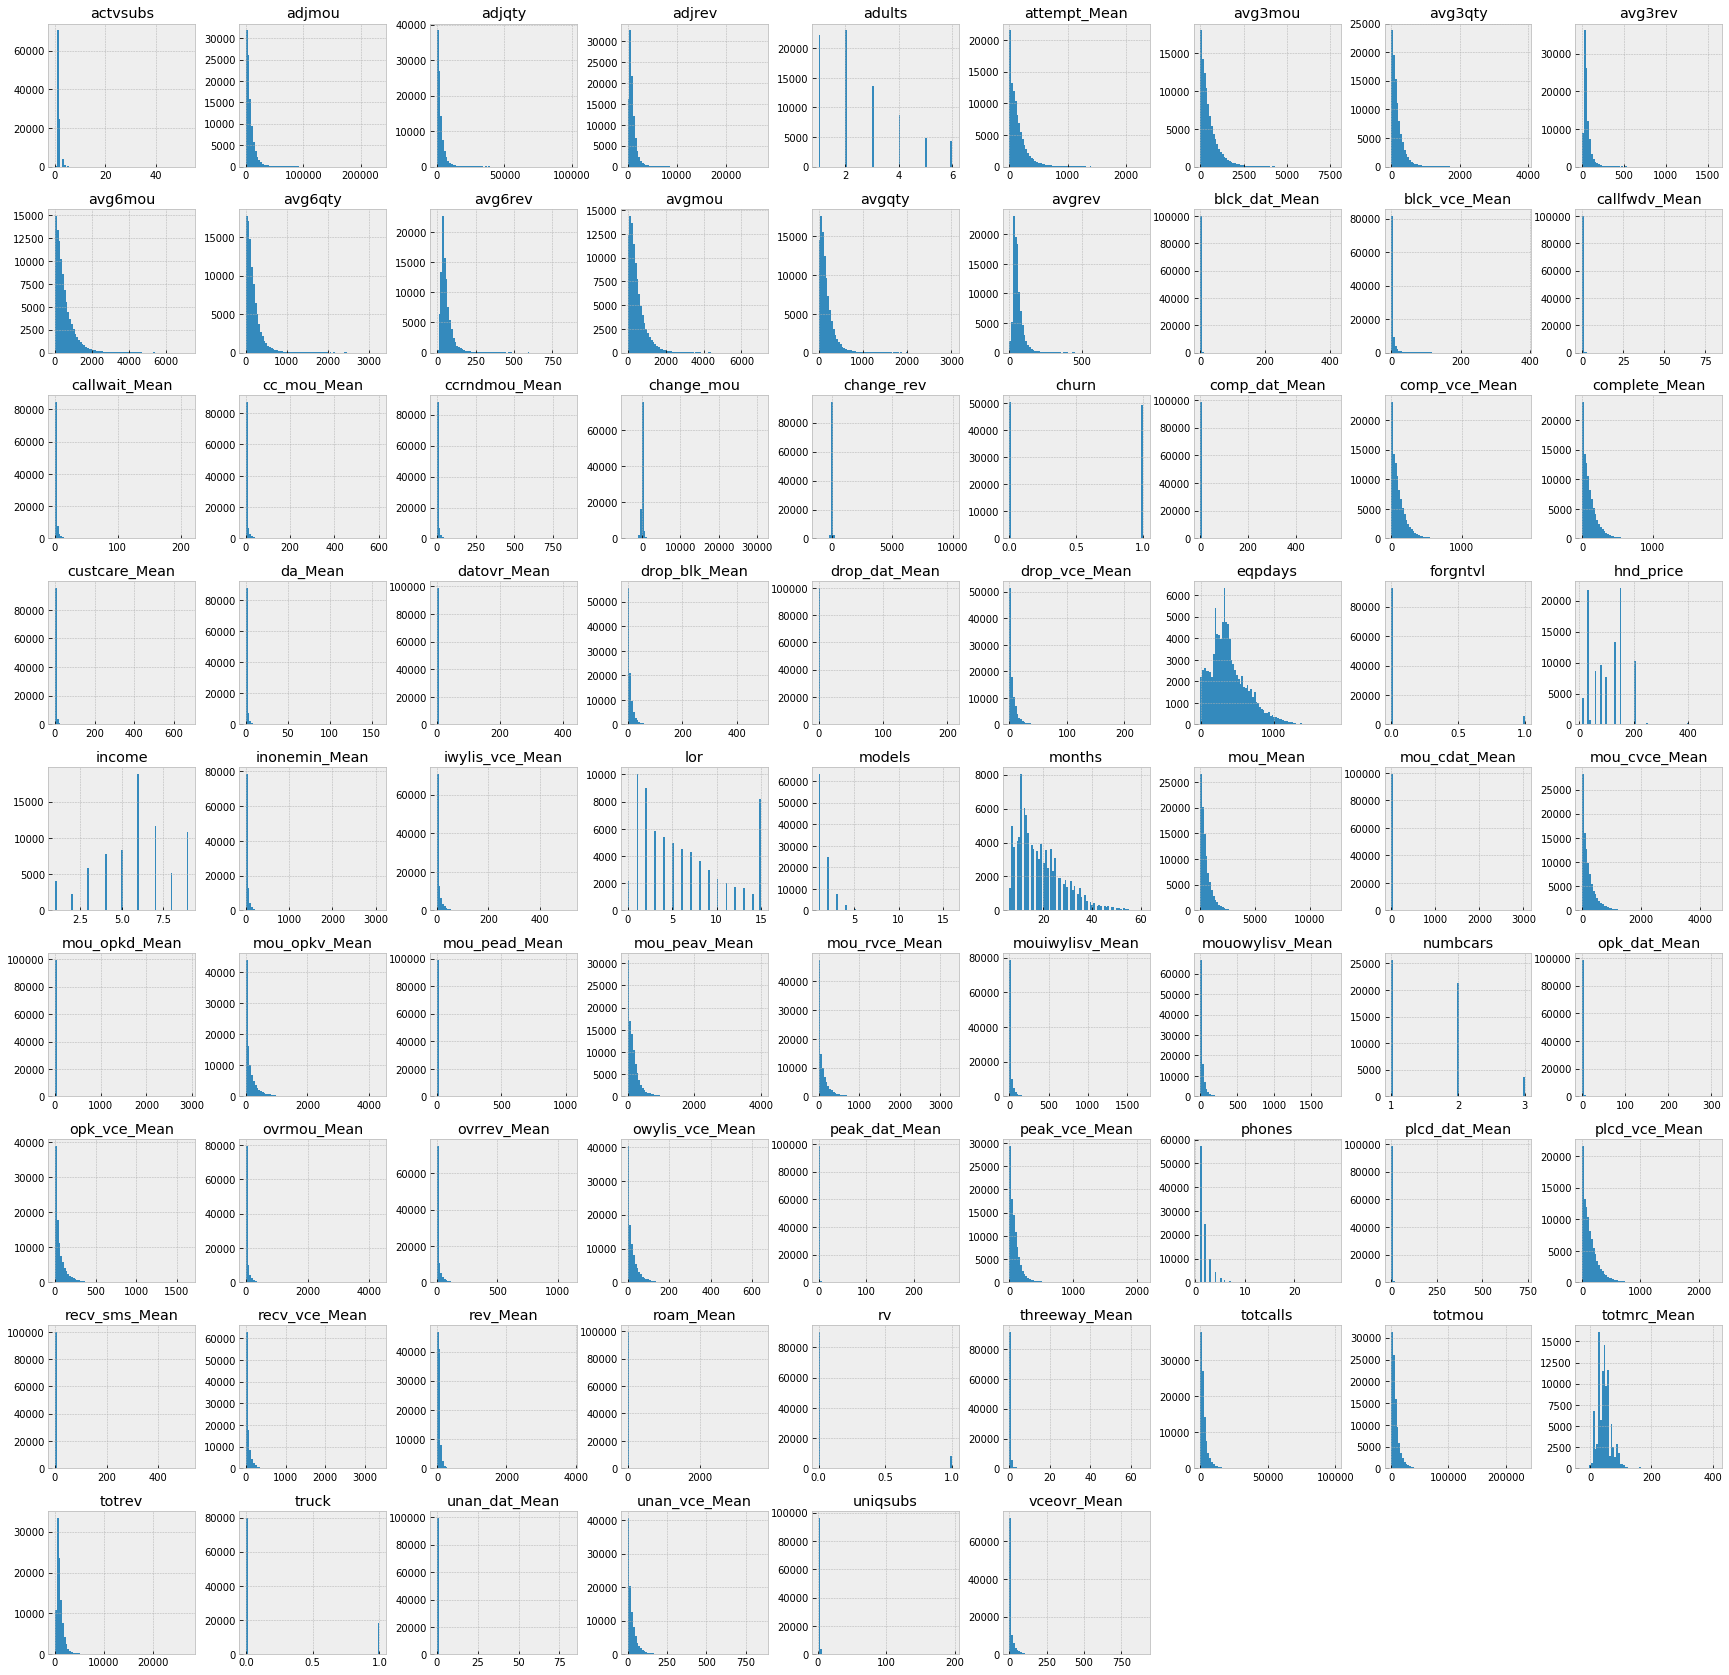

In [29]:
telecom_num.hist(figsize=(30, 30), bins=75, xlabelsize=10, ylabelsize=10);
# ; avoid having the matplotlib verbose informations

Columns highly corelated with churn

In [80]:
#Correlation with the column churn
telecom_num_corr=telecom_num.corr()['churn'][:-1]
golden_features_list = telecom_num_corr[abs(telecom_num_corr) > 0.01].sort_values(ascending=False)
print("There is {} strongly correlated values with churn:\n{}".format(len(golden_features_list), golden_features_list))


There is 52 strongly correlated values with churn:
churn              1.000000
uniqsubs           0.039882
vceovr_Mean        0.024240
ovrrev_Mean        0.023736
months             0.020991
ovrmou_Mean        0.019720
actvsubs           0.019686
rev_Mean          -0.010883
avg3rev           -0.012702
da_Mean           -0.013551
drop_vce_Mean     -0.015261
totcalls          -0.015780
drop_blk_Mean     -0.015851
adjqty            -0.016259
totmou            -0.016949
adjmou            -0.017532
avg6rev           -0.018751
avgqty            -0.023752
avgmou            -0.024022
threeway_Mean     -0.030657
callwait_Mean     -0.031082
change_mou        -0.031536
inonemin_Mean     -0.034506
mouowylisv_Mean   -0.034914
mouiwylisv_Mean   -0.035021
cc_mou_Mean       -0.035248
unan_vce_Mean     -0.035560
custcare_Mean     -0.036393
ccrndmou_Mean     -0.037890
avg6qty           -0.038826
phones            -0.039457
iwylis_vce_Mean   -0.040853
recv_vce_Mean     -0.041779
owylis_vce_Mean   -0.0420

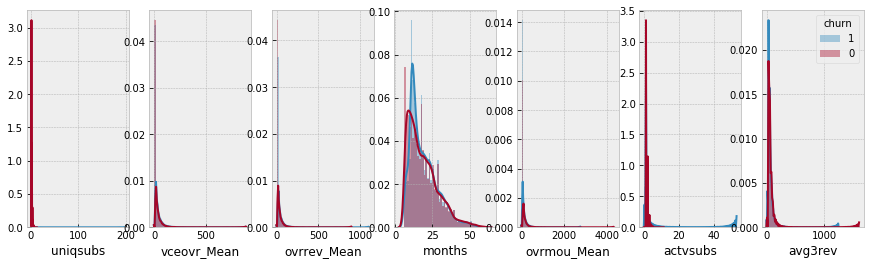

In [77]:
#Analysis of Partner continous variable

churn_yes=telecom_num[telecom_num['churn']==1]
churn_no=telecom_num[telecom_num['churn']==0]

f, axes = plt.subplots(ncols=7,nrows=1,figsize=(15,4))
#uniqsubs
sns.distplot(churn_yes.uniqsubs.dropna(),label='1',ax=axes[0])
sns.distplot(churn_no.uniqsubs.dropna(),label='0',ax=axes[0])

#vceovr_Mean
sns.distplot(churn_yes.vceovr_Mean.dropna(),label='1',ax=axes[1])
sns.distplot(churn_no.vceovr_Mean.dropna(),label='0',ax=axes[1])

#ovrrev_Mean
sns.distplot(churn_yes.ovrrev_Mean.dropna(),label='1',ax=axes[2])
sns.distplot(churn_no.ovrrev_Mean.dropna(),label='0',ax=axes[2])

#months
sns.distplot(churn_yes.months.dropna(),label='1',ax=axes[3])
sns.distplot(churn_no.months.dropna(),label='0',ax=axes[3])

#ovrmou_Mean
sns.distplot(churn_yes.ovrmou_Mean.dropna(),label='1',ax=axes[4])
sns.distplot(churn_no.ovrmou_Mean.dropna(),label='0',ax=axes[4])

#actvsubs
sns.distplot(churn_yes.actvsubs.dropna(),label='1',ax=axes[5])
sns.distplot(churn_no.actvsubs.dropna(),label='0',ax=axes[5])

#avg3rev
sns.distplot(churn_yes.avg3rev.dropna(),label='1',ax=axes[6])
sns.distplot(churn_no.avg3rev.dropna(),label='0',ax=axes[6])

plt.legend(title='churn',loc='best')

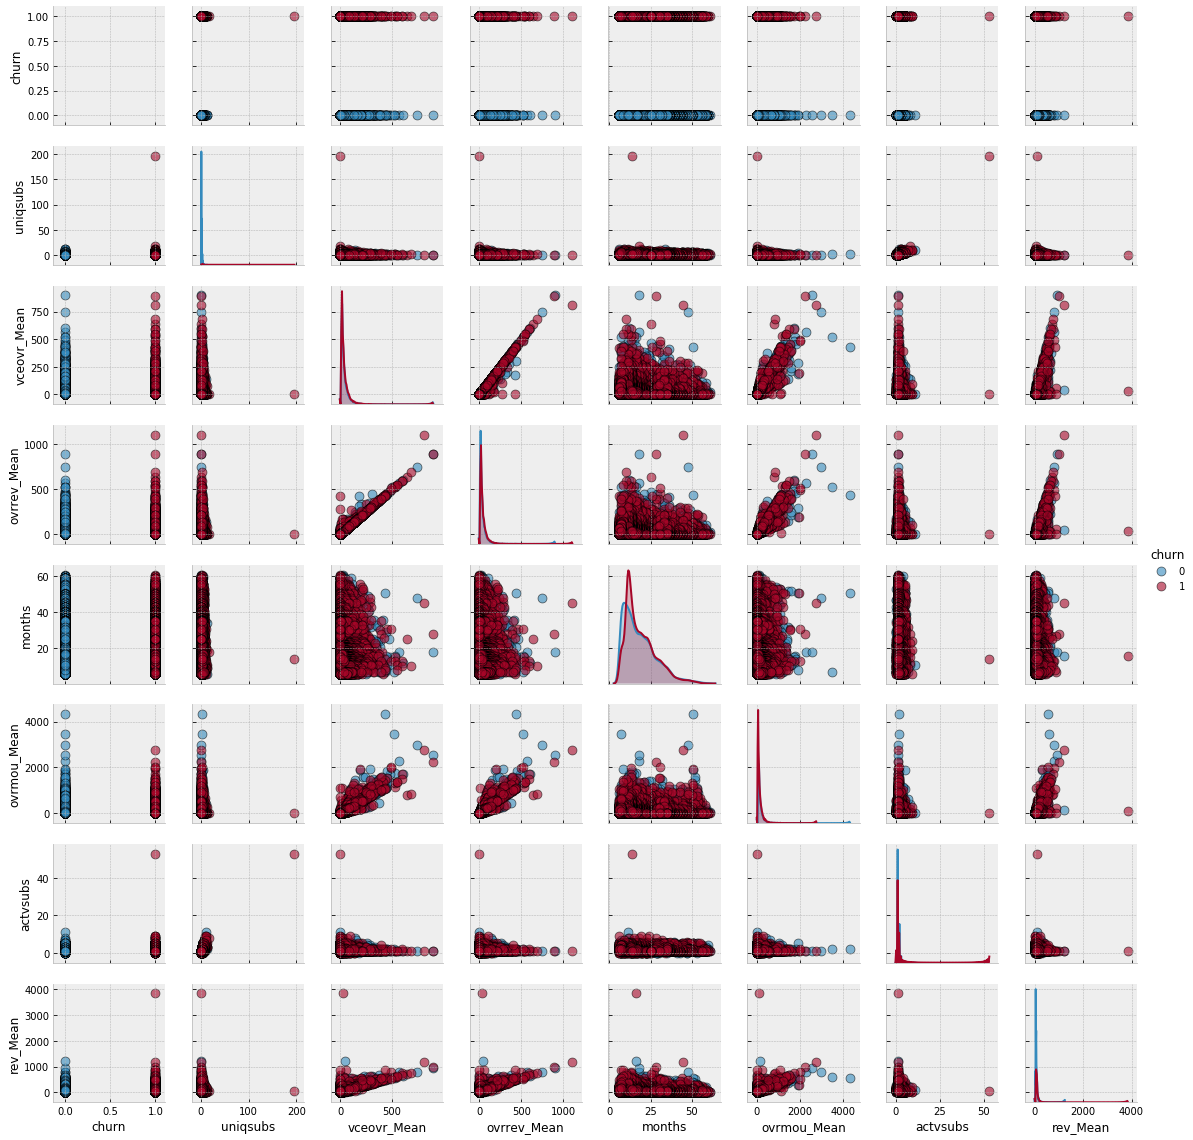

In [79]:
#sns.pairplot(telecom_num['adjrev','adjqty'], hue = 'churn')

pairs=['churn','uniqsubs','vceovr_Mean','ovrrev_Mean','months','ovrmou_Mean','actvsubs','rev_Mean']
# Create a pair plot colored by continent with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(telecom_num[pairs], hue = 'churn', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 2)

Mulitcolinearity of continous varaible

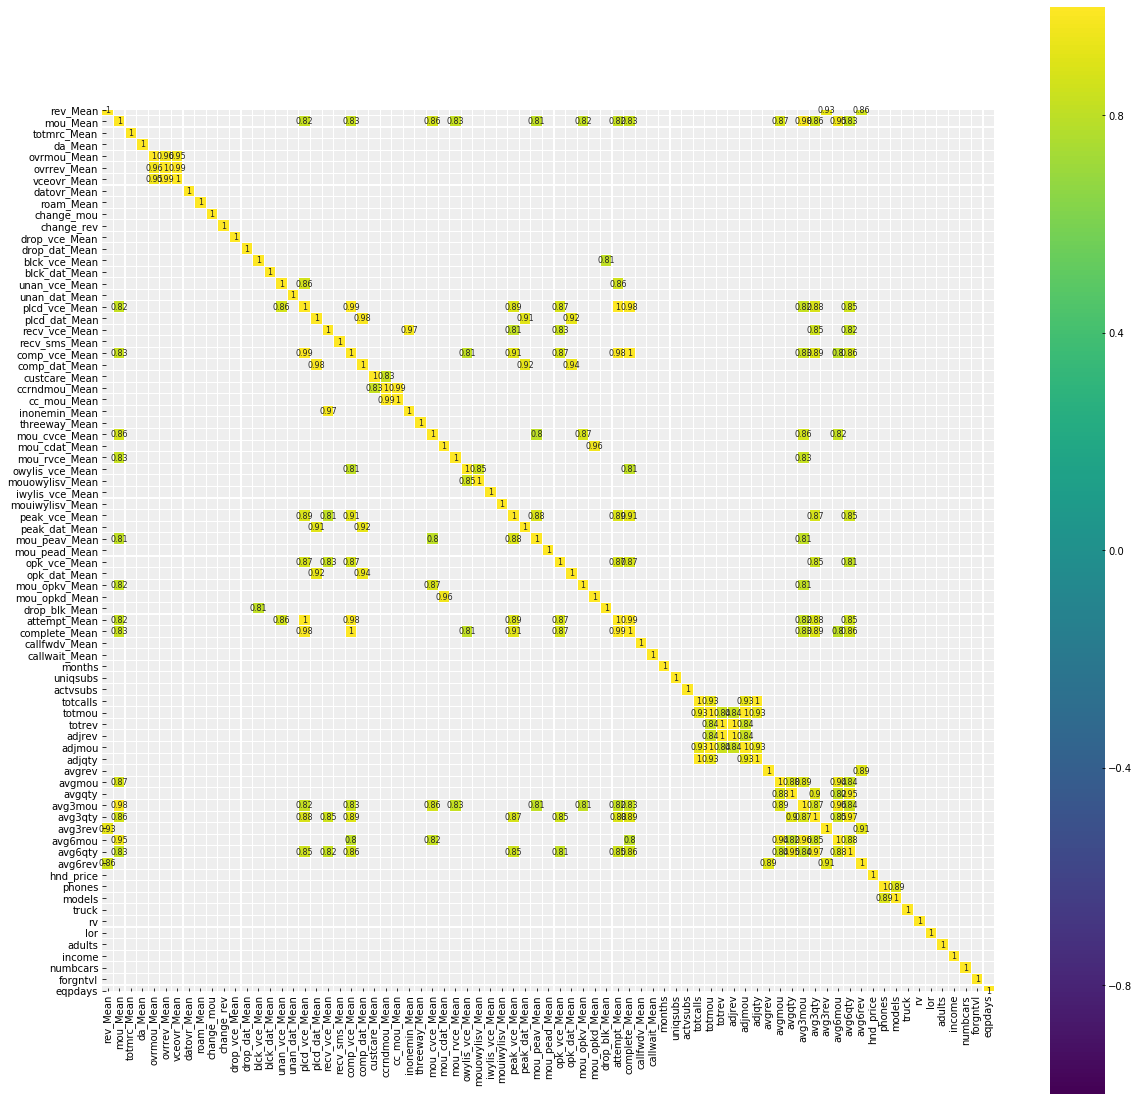

In [81]:
#Examaining the Corelation of the variables.
corr = telecom_num.drop('churn', axis=1).corr() # We already examined churn correlations
plt.figure(figsize=(20, 20))

sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.8)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [56]:
#Exploration of categorical varaible

telecom_cat = telecom.select_dtypes(include = ['object'])
telecom_cat=pd.concat([telecom_cat,telecom_num['churn']],axis=1)
telecom_cat.head()

,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,marital,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,churn
0,U,A,N,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,WCMB,O,S,S,M,C,A,N,U,U,U,U,U,Y,1
1,N,EA,N,U,CHICAGO AREA,N,N,WC,NaN,S,S,M,C,A,Z,U,U,U,U,U,Y,0
2,Y,C,N,S,GREAT LAKES AREA,N,N,NaN,O,S,M,M,C,A,N,U,Y,U,U,U,Y,1
3,Y,B,N,T,CHICAGO AREA,N,N,NaN,NaN,M,M,M,C,D,U,Y,U,U,U,U,Y,0
4,Y,A,N,U,NEW ENGLAND AREA,Y,N,WCMB,R,M,S,M,C,O,I,U,U,U,U,U,Y,0


Distribution of Categorical variable

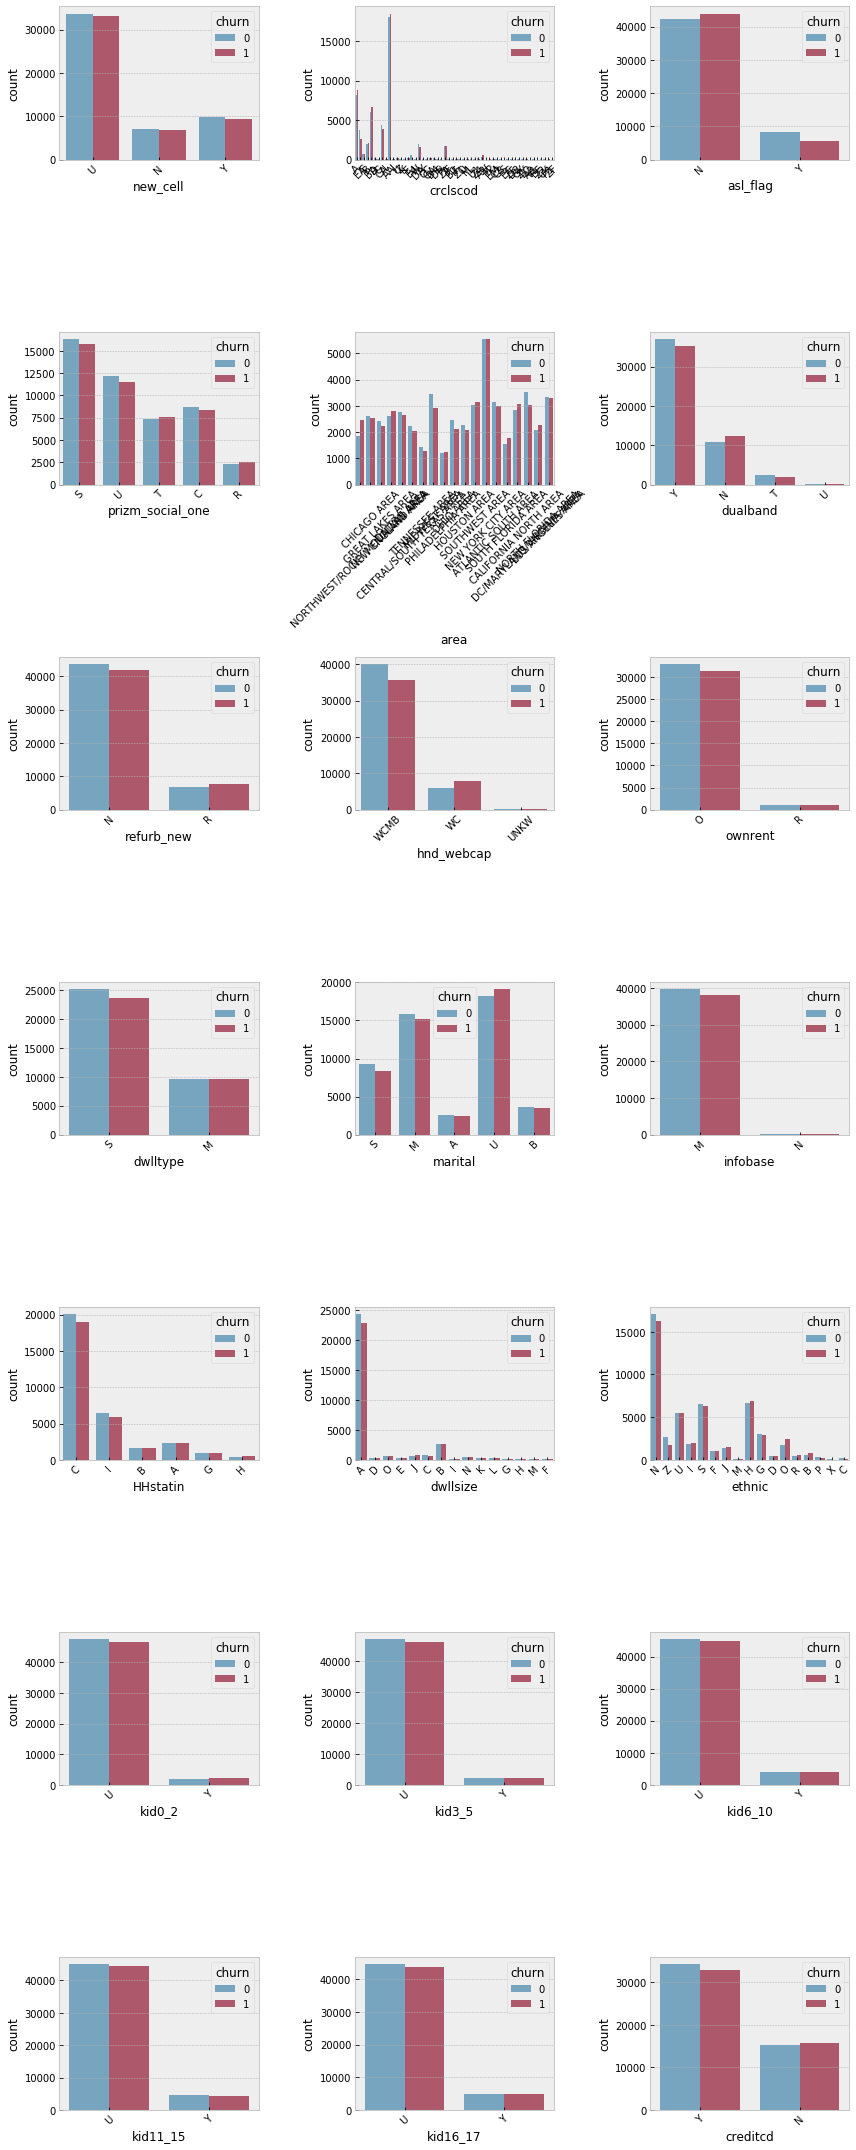

In [57]:
fig, axes = plt.subplots(round(len(telecom_cat.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(telecom_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=telecom_cat.columns[i],hue='churn', alpha=0.7, data=telecom_cat, ax=ax)

fig.tight_layout()